In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv("data.csv") # Tesla
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/25/2023,$238.59,106612200,$231.31,$239.00,$230.35
1,08/24/2023,$230.04,99777430,$238.66,$238.92,$228.1801
2,08/23/2023,$236.86,101077600,$229.34,$238.98,$229.29
3,08/22/2023,$233.19,130597900,$240.25,$240.82,$229.55
4,08/21/2023,$231.28,135702700,$221.5512,$232.1343,$220.58


In [14]:
df.rename(columns={"Close/Last" : "Close"}, inplace=True)
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [15]:
columns_to_process = ["Close", "Open", "High", "Low"]

for col in columns_to_process:
    df[col] = df[col].str.replace('$', '').astype("float")
    df[col] = df[col].astype("int64")

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

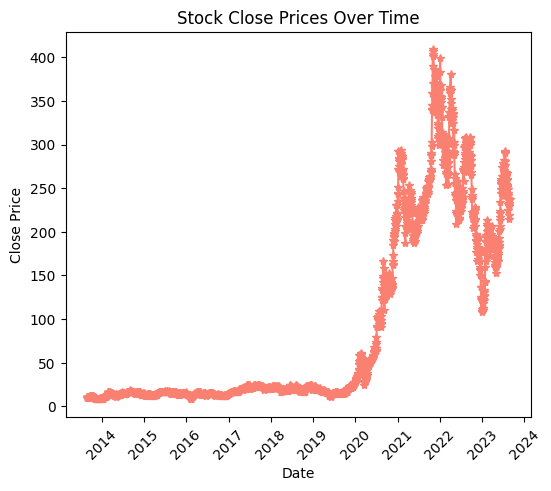

In [17]:
plt.figure(figsize=(6, 5))  # Set the figure size

plt.plot(df['Date'], df['Close'], marker='*', linestyle='-', color='salmon')  # Plotting the data
plt.xlabel('Date')  # X-axis label
plt.ylabel('Close Price')  # Y-axis label
plt.title('Stock Close Prices Over Time')  # Plot title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Show the plot

In [18]:
df["Tomorrow"] = df.Close.shift(-1)

In [19]:
df["Target"] = (df["Tomorrow"] >= df["Close"]).astype("int")
df.head()

,Date,Close,Volume,Open,High,Low,Tomorrow,Target
0,2023-08-25,238,106612200,231,239,230,230.0,0
1,2023-08-24,230,99777430,238,238,228,236.0,1
2,2023-08-23,236,101077600,229,238,229,233.0,0
3,2023-08-22,233,130597900,240,240,229,231.0,0
4,2023-08-21,231,135702700,221,232,220,215.0,0


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, min_samples_split= 10, random_state=1)

In [21]:
df = df.drop(["Volume", "Date", "Tomorrow"], axis=1)
df = df.drop(df.index[-1])
df.head()



,Close,Open,High,Low,Target
0,238,231,239,230,0
1,230,238,238,228,1
2,236,229,238,229,0
3,233,240,240,229,0
4,231,221,232,220,0


In [22]:
X = df.drop(["Target"], axis=1)
Y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


NameError: name 'train_test_split' is not defined

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=20, random_state=1)

In [ ]:
model.score(X_test,y_test)

0.8194444444444444

In [ ]:
pred = model.predict([["238.59", "231.31", "239.00", "230.35"]])
pred

/Users/ankitgupta/MyStuff/python-ds-ml/code_env/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])